In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
# Import the dataset from Github
url = 'https://raw.githubusercontent.com/padaungthar/ai-based-telecom/refs/heads/main/fwa_signal_dataset.csv'
df = pd.read_csv(url)

# Print object type, shape, and head
print("df type:", type(df))
print("df shape:", df.shape)
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (500, 6)


,distance_from_tower,line_of_sight,obstruction_type,elevation,device_height,signal_strength
0,405.813113,1,wall,5.553988,roof,-60.394886
1,953.178591,0,glass,16.257028,roof,-98.395428
2,745.394245,0,glass,26.188375,window,-93.147053
3,618.725560,0,wall,21.966747,window,-100.689218
4,198.217708,0,wall,24.196834,roof,-85.686024


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   distance_from_tower  500 non-null    float64
 1   line_of_sight        500 non-null    int64  
 2   obstruction_type     500 non-null    object 
 3   elevation            500 non-null    float64
 4   device_height        500 non-null    object 
 5   signal_strength      500 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 23.6+ KB


In [4]:
# Change the data type of 'line_of_sight' to "bool" type makes perfect sense and improves data clarity.
# df['line_of_sight'] = df['line_of_sight'].astype(bool)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   distance_from_tower  500 non-null    float64
 1   line_of_sight        500 non-null    int64  
 2   obstruction_type     500 non-null    object 
 3   elevation            500 non-null    float64
 4   device_height        500 non-null    object 
 5   signal_strength      500 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 23.6+ KB


In [5]:
df['obstruction_type'].value_counts()

,count
obstruction_type,
wall,132
none,131
glass,127
tree,110


In [6]:
df['device_height'].value_counts()

,count
device_height,
window,174
roof,172
indoor,154


In [7]:
# 🧹 Step 3: Preprocess the Data
df_encoded = pd.get_dummies(df, columns=['obstruction_type', 'device_height'], drop_first=False)

X = df_encoded.drop("signal_strength", axis=1)
y = df_encoded["signal_strength"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   distance_from_tower     500 non-null    float64
 1   line_of_sight           500 non-null    int64  
 2   elevation               500 non-null    float64
 3   signal_strength         500 non-null    float64
 4   obstruction_type_glass  500 non-null    bool   
 5   obstruction_type_none   500 non-null    bool   
 6   obstruction_type_tree   500 non-null    bool   
 7   obstruction_type_wall   500 non-null    bool   
 8   device_height_indoor    500 non-null    bool   
 9   device_height_roof      500 non-null    bool   
 10  device_height_window    500 non-null    bool   
dtypes: bool(7), float64(3), int64(1)
memory usage: 19.2 KB


In [9]:
X.head()

,distance_from_tower,line_of_sight,elevation,obstruction_type_glass,obstruction_type_none,obstruction_type_tree,obstruction_type_wall,device_height_indoor,device_height_roof,device_height_window
0,405.813113,1,5.553988,False,False,False,True,False,True,False
1,953.178591,0,16.257028,True,False,False,False,False,True,False
2,745.394245,0,26.188375,True,False,False,False,False,False,True
3,618.725560,0,21.966747,False,False,False,True,False,False,True
4,198.217708,0,24.196834,False,False,False,True,False,True,False


In [10]:
# 🔀 Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [11]:
# 🧠 Step 5: Train the Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [12]:
# 📈 Step 6: Evaluate the Model
y_pred = model.predict(X_test)

print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Absolute Error (MAE): 2.003603768092387
R² Score: 0.9885322007569107


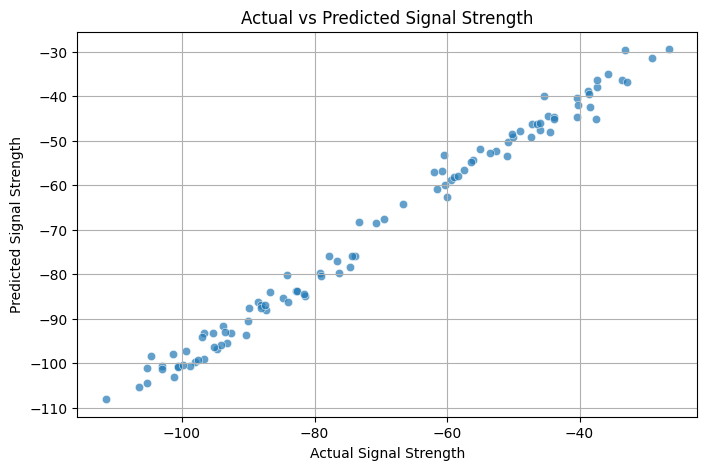

In [13]:
# 📊 Step 7: Visualize Prediction vs Actual
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Signal Strength")
plt.ylabel("Predicted Signal Strength")
plt.title("Actual vs Predicted Signal Strength")
plt.grid(True)
plt.show()

In [15]:
# 💡 Step 8: Try a Prediction Example
example = pd.DataFrame({
    'distance_from_tower': [500],
    'line_of_sight': [True],
    'elevation': [25],
    'obstruction_type_glass': [0],
    'obstruction_type_none': [1],
    'obstruction_type_tree': [0],
    'obstruction_type_wall': [0],
    'device_height_indoor': [0],
    'device_height_roof': [1],
    'device_height_window': [0]
})
example_scaled = scaler.transform(example)
prediction = model.predict(example_scaled)
print("📡 Predicted Signal Strength (dBm):", prediction[0])

📡 Predicted Signal Strength (dBm): -42.21599919935468


In [16]:
example.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   distance_from_tower     1 non-null      int64
 1   line_of_sight           1 non-null      bool 
 2   elevation               1 non-null      int64
 3   obstruction_type_glass  1 non-null      int64
 4   obstruction_type_none   1 non-null      int64
 5   obstruction_type_tree   1 non-null      int64
 6   obstruction_type_wall   1 non-null      int64
 7   device_height_indoor    1 non-null      int64
 8   device_height_roof      1 non-null      int64
 9   device_height_window    1 non-null      int64
dtypes: bool(1), int64(9)
memory usage: 205.0 bytes


In [18]:
# *** Visualize signal strength heatmaps ***

In [17]:
# 📐 Define a grid of values for distance and elevation
distances = np.linspace(50, 1000, 50)  # 50m to 1000m
elevations = np.linspace(0, 30, 50)    # 0m to 30m

In [19]:
# 🔄 Create all combinations of distance and elevation
grid = np.array([[d, e] for d in distances for e in elevations])
grid_df = pd.DataFrame(grid, columns=['distance_from_tower', 'elevation'])

In [20]:
# 📌 Add constant values for other features
grid_df['line_of_sight'] = True
grid_df['obstruction_type_glass'] = 0
grid_df['obstruction_type_none'] = 1
grid_df['obstruction_type_tree'] = 0
grid_df['obstruction_type_wall'] = 0
grid_df['device_height_indoor'] = 0
grid_df['device_height_roof'] = 1
grid_df['device_height_window'] = 1

In [21]:
# 🧭 Rearrange column order to match training data
grid_df = grid_df[[
    'distance_from_tower',
    'line_of_sight',
    'elevation',
    'obstruction_type_glass',
    'obstruction_type_none',
    'obstruction_type_tree',
    'obstruction_type_wall',
    'device_height_indoor',
    'device_height_roof',
    'device_height_window'
]]

In [22]:
# 🔢 Scale the inputs and predict
grid_scaled = scaler.transform(grid_df)
grid_preds = model.predict(grid_scaled)

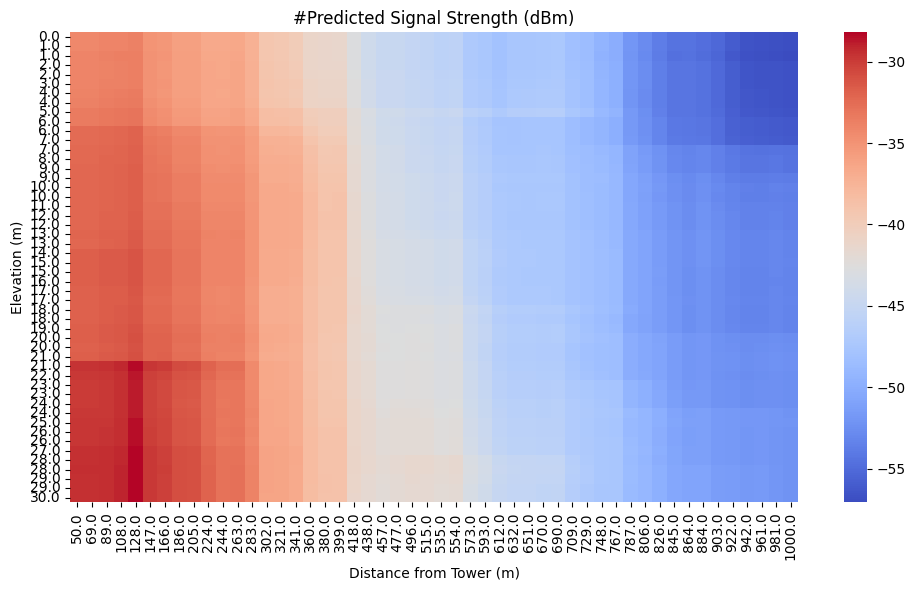

In [23]:
#  🗺️ Plot the heatmap
heatmap = grid_preds.reshape(len(distances), len(elevations))
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap.T, xticklabels=np.round(distances, 0), yticklabels=np.round(elevations, 0), cmap='coolwarm')
plt.xlabel("Distance from Tower (m)")
plt.ylabel("Elevation (m)")
plt.title("#Predicted Signal Strength (dBm)")
plt.tight_layout()
plt.show()

**Add Interactive Sliders**

In [25]:
!pip install ipywidgets
from ipywidgets import interact, FloatSlider, Dropdown, Checkbox

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.0 MB/s eta 0:00:00


In [26]:
def predict_signal(distance_from_tower, elevation, line_of_sight, obstruction_type, device_height):
    # Set one-hot encoding flags
    obstruction_options = ['glass', 'none', 'tree', 'wall']
    device_options = ['indoor', 'roof', 'window']

    row = {
        'distance_from_tower': distance_from_tower,
        'line_of_sight': line_of_sight,
        'elevation': elevation,
        'obstruction_type_glass': int(obstruction_type == 'glass'),
        'obstruction_type_none': int(obstruction_type == 'none'),
        'obstruction_type_tree': int(obstruction_type == 'tree'),
        'obstruction_type_wall': int(obstruction_type == 'wall'),
        'device_height_indoor': int(device_height == 'indoor'),
        'device_height_roof': int(device_height == 'roof'),
        'device_height_window': int(device_height == 'window'),
    }

    input_df = pd.DataFrame([row])
    input_scaled = scaler.transform(input_df)
    prediction = model.predict(input_scaled)[0]

    print(f"📡 Predicted Signal Strength: {prediction:.2f} dBm")


In [27]:
interact(
    predict_signal,
    distance_from_tower=FloatSlider(min=50, max=1000, step=10, value=200, description="Distance (m)"),
    elevation=FloatSlider(min=0, max=30, step=1, value=5, description="Elevation (m)"),
    line_of_sight=Checkbox(value=True, description="Line of Sight"),
    obstruction_type=Dropdown(options=['none', 'glass', 'tree', 'wall'], value='none', description="Obstruction"),
    device_height=Dropdown(options=['roof', 'indoor', 'window'], value='roof', description="Device Height")
);

interactive(children=(FloatSlider(value=200.0, description='Distance (m)', max=1000.0, min=50.0, step=10.0), F…